# 02.07 - Fancy Indexing

**Fancy indexing** allows us to pass arrays of indices in place of single scalars in order to access multiple elements at once.

In [3]:
import numpy as np

In [7]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could pass them individually:

In [8]:
[x[3], x[7], x[2]]

[71, 86, 14]

.. or use an array of indices to obtain the same result:

In [9]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Furthermore, fancy indexing let us maintain the shape of the _index arrays_:

In [10]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing is also useful for dealing with multiple dimensions:

In [11]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [12]:
row = np.array([0, 1, ])
col = np.array([, 1, 3])
X[row, col] # Values = row + col (e.g. 0,2)

array([ 2,  5, 11])

### Combined Indexing

We can combine fancy + simple indexing:

In [13]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
X[1, [1, 2, 0]]

array([5, 6, 4])

Fancy indexing + slicing:

In [15]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [16]:
mask = np.array([1, 0, 0, 1], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  3],
       [ 4,  7],
       [ 8, 11]])

### Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix. 

In [17]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

We can visualized these points in a scatterplot:

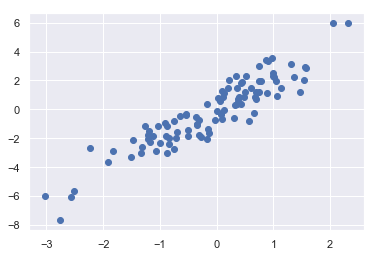

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

We will now select 25 random points and use fancy indexing to circle them in the graph:

In [24]:
indices = np.random.choice(X.shape[0], 25, replace=False)
indices

array([43, 28, 78, 44,  9, 92, 55, 20, 56,  3, 69, 58, 57, 13, 71, 51, 22,
       84, 41,  7,  0, 38, 50, 26, 94])

In [25]:
selection = X[indices]
selection.shape

(25, 2)

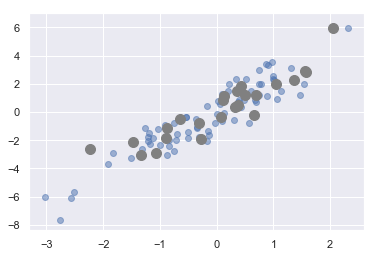

In [50]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='grey', s=100);

**Note**: This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models.

### Modifying Values with Fancy Indexing

The same methods can be used to modify arrays. We can change the values:

In [58]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


Or apply operations on multiple elements simultaneously:

In [59]:
x[i] -= 11
print(x)

[ 0 88 88  3 88  5  6  7 88  9]


**Note**: Careful with multiple assignments to the same index!

In [60]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [61]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

### Example: Binning Data

Fancy indexing and <code>ufunc.at</code> can be used to create bins for histograms.

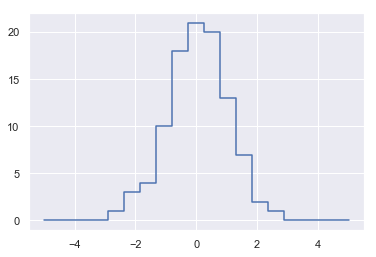

In [62]:
np.random.seed(99)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

# plot the results
plt.plot(bins, counts, linestyle='steps');

Of course, a faster way to do this is using the <code>np.histogram</code> function.

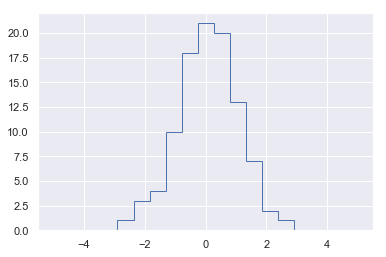

In [63]:
plt.hist(x, bins, histtype='step');